In [1]:
!pip install gdown
import gdown

In [2]:
dataset = '11_tfjxkFmSbVHSM_NA99ONfrofsq1upa'
url = f'https://drive.google.com/uc?id={dataset}'
output_path = '/dataset.csv'
gdown.download(url, output_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=11_tfjxkFmSbVHSM_NA99ONfrofsq1upa
To: /dataset.csv
100%|██████████| 11.3k/11.3k [00:00<00:00, 17.8MB/s]


'/dataset.csv'

# **IMPORT LIBRARIES:**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# **DATA INFO:**

In [4]:
import pandas as pd
df = pd.read_csv(output_path)
df.dtypes

,0
age,int64
sex,int64
cp,int64
trtbps,int64
chol,int64
fbs,int64
restecg,int64
thalachh,int64
exng,int64
oldpeak,float64


In [5]:
display(df.head(10))
print(30*"-","COLUMNS",30*"-")
print(df.columns,"\n",30*"-","INFO",30*"-")
display(df.info())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


------------------------------ COLUMNS ------------------------------
Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object') 
 ------------------------------ INFO ------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output   

None

In [6]:
df.shape

(303, 14)

In [7]:
print(f"number of null values : {df.isnull().sum().sum()}")
print(f"number of dublicate values is : {df.duplicated().sum()}")

number of null values : 0
number of dublicate values is : 1


# **Exploratory Data Analysis (EDA):**

<ipython-input-8-3c4256af323e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='output', data=df, palette='Blues')


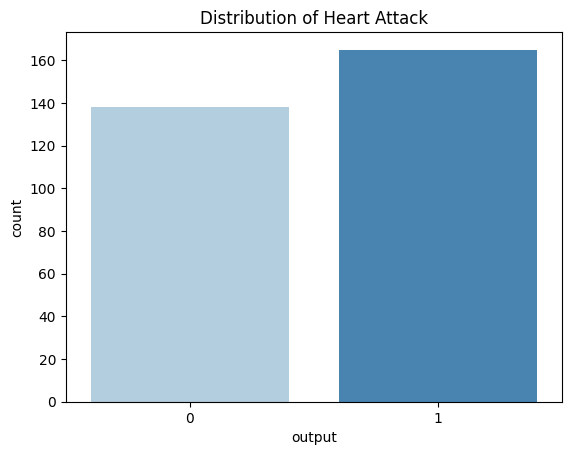

In [8]:
sns.countplot(x='output', data=df, palette='Blues')
plt.title('Distribution of Heart Attack')
plt.show()

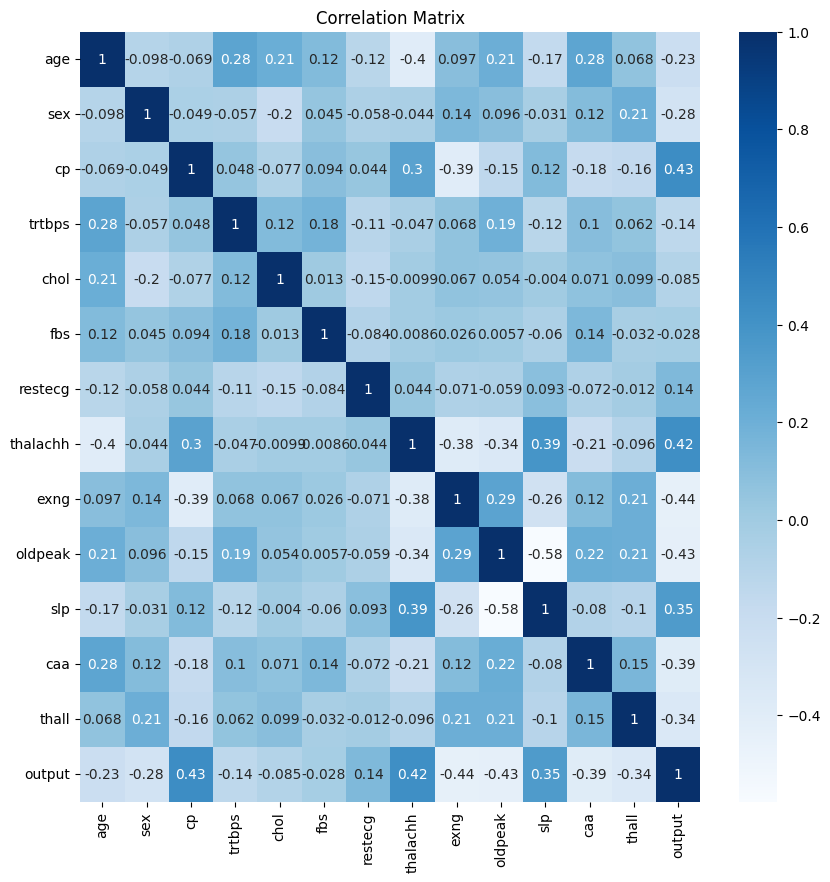

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap( df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

# **Model Building:**

In [10]:
X = df.drop('output', axis=1)
y = df['output']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Linear Regression': LinearRegression()
}

In [14]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Apply classification metrics only to classification models
    if name != 'Linear Regression':
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {accuracy: 2.2f}")
        print(classification_report(y_test, y_pred))
    else:
      # Use regression metrics for Linear Regression
         r2 = r2_score(y_test, y_pred)
         print(f"{name} R-squared: {r2: 2.2f}")

Training Logistic Regression...
Logistic Regression Accuracy:  0.85
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Training Decision Tree...
Decision Tree Accuracy:  0.84
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.75      0.83        32

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61

Training KNN...
KNN Accuracy:  0.90
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy          

In [20]:
# prompt: implement bagging


from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier

# Create a BaggingClassifier with a Decision Tree as the base estimator
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
# Changed 'base_estimator' to 'estimator'

# Train the Bagging model
bagging_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the Bagging model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Accuracy: {accuracy_bagging: 2.2f}")
print(classification_report(y_test, y_pred_bagging))


Bagging Accuracy:  0.80
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



In [21]:
# prompt: implement adaboast

from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoostClassifier with a Decision Tree as the base estimator
adaboost_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Train the AdaBoost model
adaboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the AdaBoost model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Accuracy: {accuracy_adaboost: 2.2f}")
print(classification_report(y_test, y_pred_adaboost))

AdaBoost Accuracy:  0.82
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [22]:
# prompt: implement xgboast

!pip install xgboost

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb: 2.2f}")
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy:  0.82
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



# **Model Accuracy:**

In [27]:
# prompt: calculate the accuracy of adaboast and xgboast

# ... (Your existing code) ...

# Evaluate the AdaBoost model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Accuracy: {accuracy_adaboost: 2.2f}")

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb: 2.2f}")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if name != 'Linear Regression':
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {accuracy:.2f}")
    else:
        # Use regression metrics for Linear Regression
        r2 = r2_score(y_test, y_pred)
        print(f"{name} R-squared: {r2:.2f}")


AdaBoost Accuracy:  0.82
XGBoost Accuracy:  0.82
Logistic Regression Accuracy: 0.85
Decision Tree Accuracy: 0.80
KNN Accuracy: 0.90
Linear Regression R-squared: 0.53


# **Model Comparison**

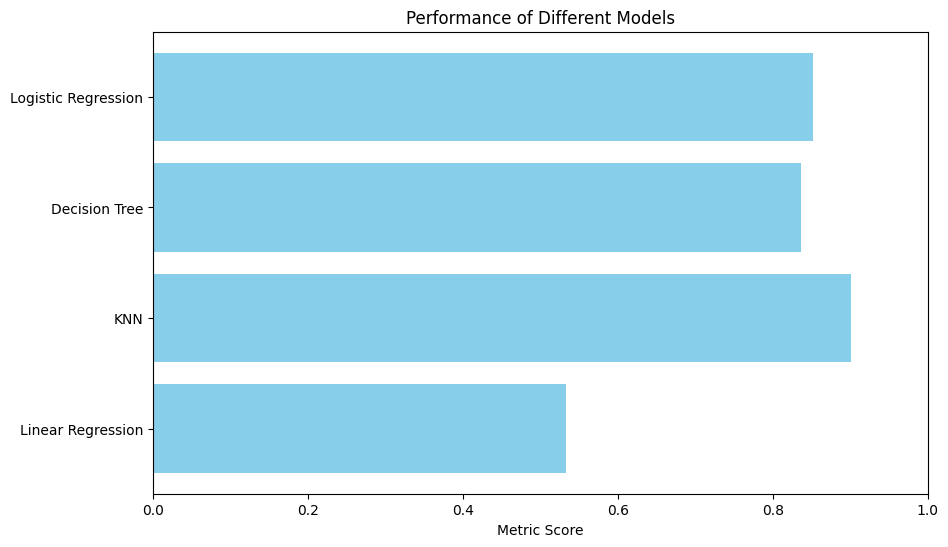

In [24]:
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if name != 'Linear Regression':
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[name] = accuracy
    else:
        # Use regression metrics for Linear Regression
        r2 = r2_score(y_test, y_pred)
        accuracies[name] = r2 # Store R-squared for Linear Regression


# Create a bar plot for accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Metric Score')
plt.title('Performance of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()

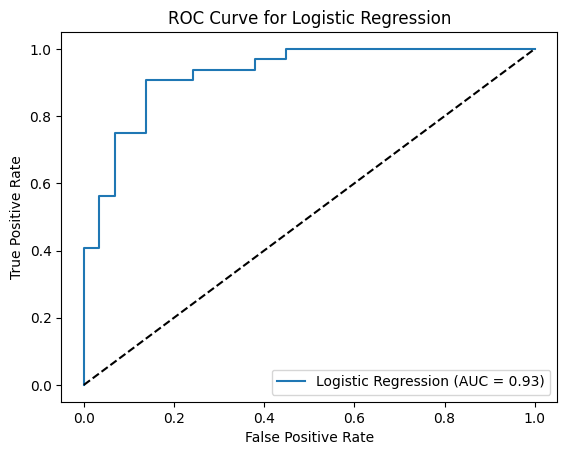

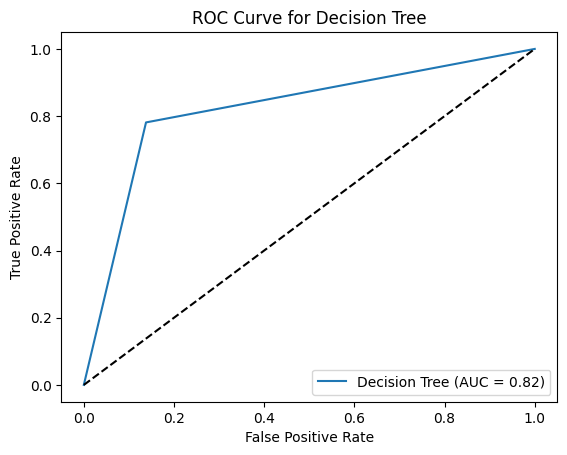

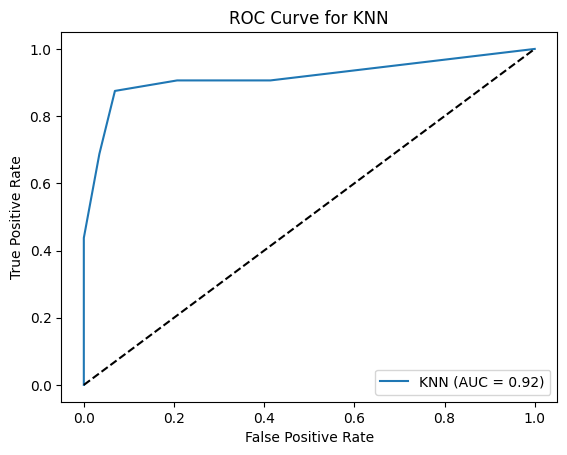

In [25]:
for name, model in models.items():
    if name != 'Linear Regression':  # ROC curve is for classification models
        model.fit(X_train, y_train)
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class

        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend(loc='lower right')
        plt.show()

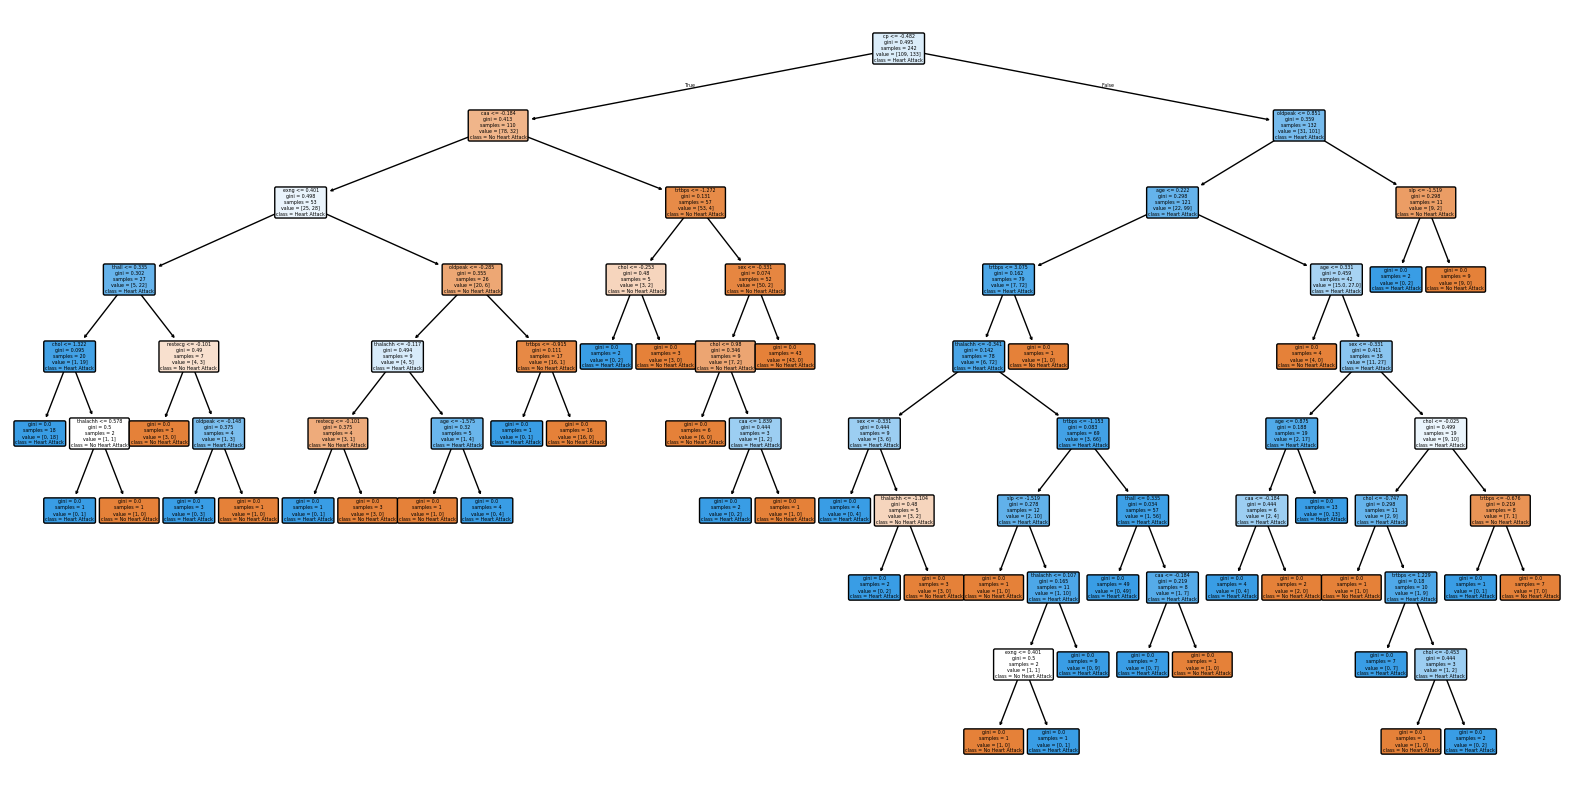

In [26]:
from sklearn.tree import plot_tree
decision_tree_model = models['Decision Tree']

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model,
          feature_names=X.columns,
          class_names=['No Heart Attack', 'Heart Attack'],
          filled=True,
          rounded=True)
plt.show()